# - First try about my project - 

### Importando as bibliotecas e lendo o arquivo .csv

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Dados_Ovinos.csv', sep=',')

In [6]:
df

,Rebanho,Data da coleta,Animal,AOL,POL,COL,EGS,ECC,PESOVIVO,PESOABATE,RC,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,Ricardo,23/02/2022,amarelo,"10,26","2,53","5,19","4,68",NaN,"47,1","21,6","45,86",1.0,70.0,70.0,73.0,NaN,89.0,43.0,NaN
1,Ricardo,23/02/2022,vermelho,"8,71","2,07","5,13","3,71",NaN,"37,35","17,4","46,59",1.0,67.0,70.0,67.0,NaN,79.0,41.0,NaN
2,Ricardo,23/02/2022,azul,"10,01","2,4","5,19","2,82",NaN,"37,3","16,3","43,70",2.0,72.0,63.0,61.0,NaN,76.0,41.0,NaN
3,Ricardo,23/02/2022,branco,"9,55","2,42","5,6","2,63",NaN,"33,55","17,3","51,56",2.0,67.0,67.0,68.0,NaN,76.0,32.0,NaN
4,Ricardo,23/02/2022,rosa,"9,83","2,56","5,2","3,14",NaN,35,15,"42,86",2.0,57.0,62.0,64.0,NaN,78.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,CTT,04/05/2022,4445,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,CTT,04/05/2022,7906,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,CTT,04/05/2022,7997,NaN,NaN,NaN,NaN,"3,5",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,CTT,04/05/2022,7859,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop('Rebanho', axis=1)
df = df.drop('Data da coleta', axis=1)
df = df.drop('Animal', axis=1)
df = df.drop('PESOABATE', axis=1)
df = df.drop('RC', axis=1)

df

,AOL,POL,COL,EGS,ECC,PESOVIVO,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,"10,26","2,53","5,19","4,68",NaN,"47,1",1.0,70.0,70.0,73.0,NaN,89.0,43.0,NaN
1,"8,71","2,07","5,13","3,71",NaN,"37,35",1.0,67.0,70.0,67.0,NaN,79.0,41.0,NaN
2,"10,01","2,4","5,19","2,82",NaN,"37,3",2.0,72.0,63.0,61.0,NaN,76.0,41.0,NaN
3,"9,55","2,42","5,6","2,63",NaN,"33,55",2.0,67.0,67.0,68.0,NaN,76.0,32.0,NaN
4,"9,83","2,56","5,2","3,14",NaN,35,2.0,57.0,62.0,64.0,NaN,78.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,1,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,2,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,"3,5",NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in df[nameColumns]]
    return aux

for x in df:
    df[x] = replaceFloat(x)

df

,AOL,POL,COL,EGS,ECC,PESOVIVO,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,10.26,2.53,5.19,4.68,NaN,47.10,1.0,70.0,70.0,73.0,NaN,89.0,43.0,NaN
1,8.71,2.07,5.13,3.71,NaN,37.35,1.0,67.0,70.0,67.0,NaN,79.0,41.0,NaN
2,10.01,2.40,5.19,2.82,NaN,37.30,2.0,72.0,63.0,61.0,NaN,76.0,41.0,NaN
3,9.55,2.42,5.60,2.63,NaN,33.55,2.0,67.0,67.0,68.0,NaN,76.0,32.0,NaN
4,9.83,2.56,5.20,3.14,NaN,35.00,2.0,57.0,62.0,64.0,NaN,78.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,3.5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

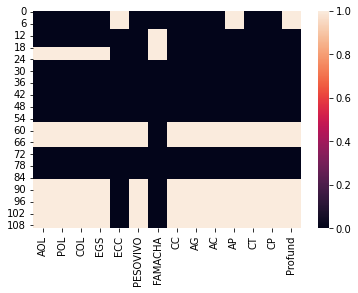

In [9]:
sns.heatmap(df.isnull())

### Tratando alguns valores NaN
#### Lembrar de variar os procedimentos dos valores NaN's afim de encontrar a melhor forma de trata-los

In [10]:
df.isnull().sum() #check for missing values

AOL         45
POL         45
COL         45
EGS         45
ECC         22
PESOVIVO    38
FAMACHA     16
CC          38
AG          38
AC          38
AP          47
CT          38
CP          38
Profund     47
dtype: int64

In [11]:
df = df[df['AOL'].notna()] # Deleta todas as linhas com NaN ou null na coluna AOL.

<AxesSubplot:>

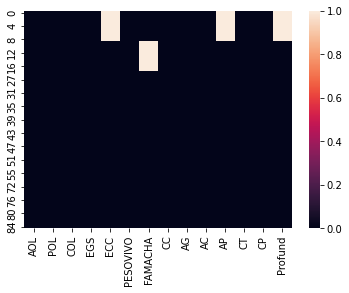

In [12]:
sns.heatmap(df.isnull())

In [13]:
df = df.dropna() #Deleta todas as linhas com NaN ou null que restaram.

<AxesSubplot:>

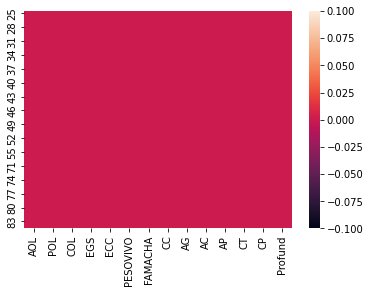

In [14]:
sns.heatmap(df.isnull())

In [15]:
df

,AOL,POL,COL,EGS,ECC,PESOVIVO,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
25,8.50,2.18,4.33,1.99,2.5,41.20,2.0,64.0,71.0,72.0,44.0,80.0,41.0,28.0
26,8.30,2.22,4.12,2.83,3.5,45.00,2.0,70.0,69.0,72.0,37.0,92.0,43.0,35.0
27,8.20,1.99,4.97,3.01,2.5,40.75,1.0,68.0,71.0,73.0,40.0,81.0,43.0,33.0
28,6.70,1.97,4.19,2.47,2.5,34.60,3.0,66.0,62.0,64.0,34.0,73.0,38.0,30.0
29,9.75,2.36,4.65,3.30,3.5,37.60,3.0,62.0,73.0,73.0,39.0,81.0,42.0,34.0
30,8.64,2.06,4.78,1.17,2.0,40.40,4.0,68.0,71.0,68.0,31.0,81.0,44.0,37.0
31,8.06,1.84,4.49,3.60,2.5,34.90,3.0,58.0,69.0,66.0,35.0,74.0,31.0,31.0
32,9.50,2.06,5.08,2.40,2.5,40.20,2.0,65.0,78.0,77.0,39.0,82.0,35.0,38.0
33,8.39,1.84,4.82,4.00,2.5,39.10,3.0,79.0,71.0,70.0,41.0,84.0,45.0,29.0
34,10.99,2.10,5.38,2.43,2.5,36.00,3.0,67.0,69.0,70.0,35.0,82.0,37.0,35.0


## Treinando o modelo

In [16]:
X = df.drop('AOL', axis=1)
y = df['AOL']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [18]:
print(X_train, X_test)

     POL   COL   EGS  ECC  PESOVIVO  FAMACHA    CC    AG    AC    AP    CT  \
83  2.22  4.69  2.41  2.0     42.70      3.0  64.0  74.0  78.0  50.0  85.0   
27  1.99  4.97  3.01  2.5     40.75      1.0  68.0  71.0  73.0  40.0  81.0   
75  2.50  4.67  3.50  3.0     44.25      2.0  72.0  67.0  69.0  37.0  85.0   
70  1.85  3.73  1.41  2.5     30.50      3.0  61.0  68.0  70.0  36.0  77.0   
35  2.18  4.09  3.30  3.0     43.10      4.0  65.0  73.0  70.0  34.0  85.0   
46  1.95  4.39  1.86  2.0     42.20      3.0  68.0  70.0  69.0  36.0  82.0   
72  2.31  4.75  1.86  3.0     42.80      2.0  66.0  73.0  72.0  36.0  85.0   
52  2.42  5.18  1.88  4.0     38.60      2.0  64.0  63.0  63.0  32.0  81.0   
43  2.07  4.14  1.86  2.0     41.40      2.0  65.0  63.0  65.0  29.0  87.0   
69  2.19  4.23  2.23  2.5     30.35      2.0  63.0  72.0  69.0  35.0  78.0   
26  2.22  4.12  2.83  3.5     45.00      2.0  70.0  69.0  72.0  37.0  92.0   
37  2.42  5.52  3.00  2.0     29.80      3.0  65.0  72.0  68.0  

In [19]:
print(y_train, y_test)

83     7.32
27     8.20
75    10.30
70     6.62
35     9.40
46     8.61
72    10.13
52    10.07
43     8.04
69     7.92
26     8.30
37    10.90
71     6.34
80     9.56
51     9.00
30     8.64
38     8.01
47     5.73
44     7.75
42     8.88
39     7.50
29     9.75
76     9.75
49     8.79
36    11.60
41     7.74
81     8.12
84     8.50
33     8.39
78     7.27
54     7.08
50    10.37
53     6.78
25     8.50
40     9.97
74     7.83
34    10.99
Name: AOL, dtype: float64 73     6.49
48    11.31
79     7.59
77     8.98
82     8.61
45     9.71
28     6.70
55     6.81
32     9.50
31     8.06
Name: AOL, dtype: float64


In [20]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [21]:
importance = model.coef_

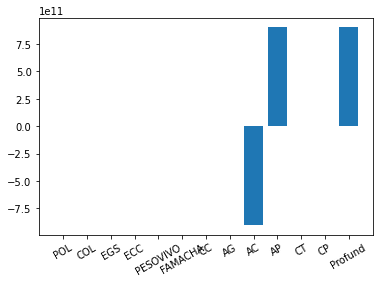

In [22]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

### Melhores valores para apurar o AOL

In [23]:
df = df.drop('AC', axis=1)

X = df.drop('AOL', axis=1)
y = df['AOL']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [25]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [26]:
importance = model.coef_

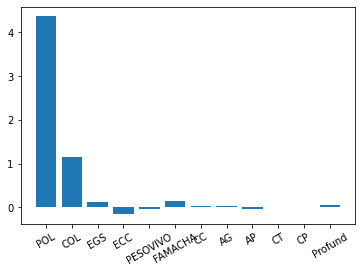

In [27]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

#### Avaliando o modelo

In [28]:
y_test_predict = model.predict(X_test)

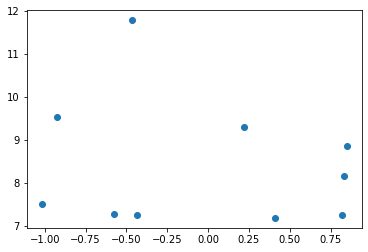

In [29]:
plt.scatter(y_test-y_test_predict,y_test_predict)
plt.show()

#### MSE -> mean_squared_error
#### R2 -> pontuação R2 eh o coeficiente de determinação, é outra métrica para avaliar seu modelo de forma confiável.)

In [30]:
# model evaluation for training set
y_train_predict = model.predict(X_train)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print(f"RMSE for training is {rmse_train}")
print(f"R2 score for training is {r2_train}")

RMSE for training is 0.5710558904756867
R2 score for training is 0.8228462078209546


In [31]:
# model evaluation for training set
y_test_predict = model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print(f"RMSE for testing is {rmse_test}")
print(f"R2 score for testing is {r2_test}")

RMSE for testing is 0.7021273329918187
R2 score for testing is 0.7718394768813004


#### Evaluation Metrics

In [32]:
print(model.intercept_)

-11.17742714656017


In [33]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
POL,4.358454
COL,1.147979
EGS,0.117869
ECC,-0.150299
PESOVIVO,-0.045127
FAMACHA,0.149679
CC,0.030462
AG,0.039226
AP,-0.037972
CT,0.022125


In [34]:
y_pred = model.predict(X_test)

In [35]:
df_aux = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_aux

,Actual,Predicted
73,6.49,7.505466
48,11.31,11.777757
79,7.59,7.178129
77,8.98,8.148865
82,8.61,9.533911
45,9.71,8.862134
28,6.70,7.277347
55,6.81,7.247672
32,9.50,9.282648
31,8.06,7.238525


In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6551851306169635
Mean Squared Error: 0.4929827917342043
Root Mean Squared Error: 0.7021273329918187
